### Quran Analysis Project

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
path = "datasets\\quran-simple-clean.csv"
df = pd.read_csv(path)

# Display the DataFrame
df.iloc[8]["text"].split(" ")

['ذلك', 'الكتاب', 'لا', 'ريب', 'ۛ', 'فيه', 'ۛ', 'هدى', 'للمتقين']

### Preprocess Verses

- Remove  بسم الله الرحمن الرحيم  from each the begining of each sura
- Remove punctuation, characters and spaces


In [2]:
# Correcting the row-wise application with axis=1
def clean_first_verse(row):
    phrase = 'بسم الله الرحمن الرحيم'
    if row['aya'] == 1 and row['text'].startswith(phrase):
        return row['text'][len(phrase):].strip()
    return row['text']

# Apply cleaning function correctly row-wise
df['text'] = df.apply(clean_first_verse, axis=1)

# Remove any characters other than Arabic letters and spaces
df['text'] = df['text'].str.replace(r'[^ء-ي\s]', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()

# Drop rows where the text became empty after cleaning
df_normalized = df[df['text'] != '']


df_normalized.head(10)


,sura,aya,text
1,1,2,الحمد لله رب العالمين
2,1,3,الرحمن الرحيم
3,1,4,مالك يوم الدين
4,1,5,إياك نعبد وإياك نستعين
5,1,6,اهدنا الصراط المستقيم
6,1,7,صراط الذين أنعمت عليهم غير المغضوب عليهم ولا ا...
7,2,1,الم
8,2,2,ذلك الكتاب لا ريب فيه هدى للمتقين
9,2,3,الذين يؤمنون بالغيب ويقيمون الصلاة ومما رزقناه...
10,2,4,والذين يؤمنون بما أنزل إليك وما أنزل من قبلك و...


Count words

In [9]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.font_manager as fm

# Step 1: Count word frequency
words = ' '.join(df_normalized['text']).split()
word_counts = Counter(words)
# Display the first 10 most common words
word_counts.most_common(10)



[('من', 2763),
 ('الله', 2152),
 ('في', 1185),
 ('ما', 1013),
 ('إن', 966),
 ('لا', 812),
 ('الذين', 810),
 ('على', 670),
 ('إلا', 664),
 ('ولا', 658)]

Create df and display counts

In [4]:
# Step 2: Create DataFrame
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
word_freq_df


,word,frequency
0,من,2763
1,الله,2152
2,في,1185
3,ما,1013
4,إن,966
...,...,...
14863,الأبتر,1
14864,عابد,1
14865,عبدتم,1
14866,والفتح,1


Display in a Bar Plot

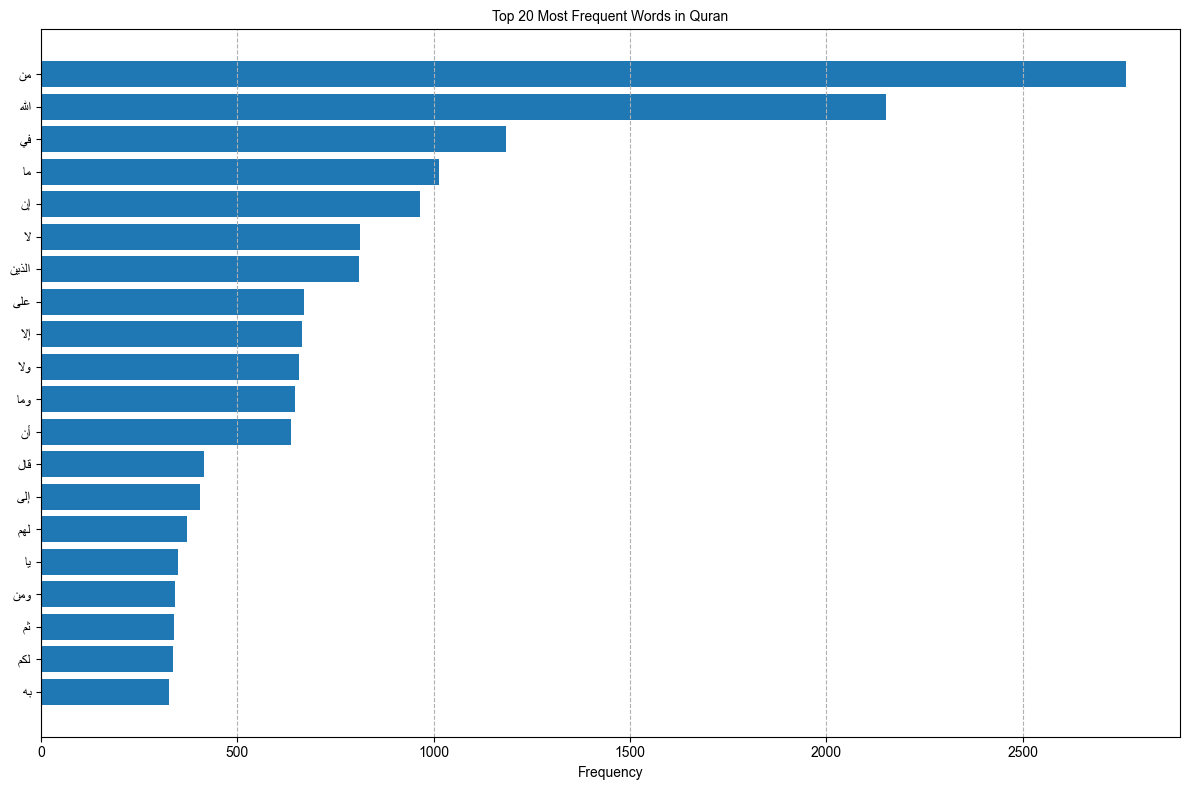

In [5]:
# Step 3: Fix Arabic word rendering
word_freq_df['word_display'] = word_freq_df['word'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Step 4: Use Arial font (assumes Arial is installed on your system)
arial_font = fm.FontProperties(family='Arial')

# Step 5: Plot
plt.figure(figsize=(12, 8))
plt.barh(word_freq_df['word_display'][:20][::-1], word_freq_df['frequency'][:20][::-1])
plt.xlabel('Frequency', fontproperties=arial_font)
plt.title('Top 20 Most Frequent Words in Quran', fontproperties=arial_font)
plt.xticks(fontproperties=arial_font)
plt.yticks(fontproperties=arial_font)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

Remove stop words and display counts again

In [11]:
import nltk
import pandas as pd

# Download the Arabic stop words from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

# Arabic stop words list
arabic_stopwords = set(stopwords.words('arabic'))

# Filter words in each verse
df_normalized['filtered_text'] = df_normalized['text'].apply(
    lambda verse: ' '.join([word for word in verse.split() if word not in arabic_stopwords])
)


# Step 1: Count word frequency
words = ' '.join(df_normalized['filtered_text']).split()
word_counts = Counter(words)
# Display the first 10 most common words
word_counts.most_common(100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\me\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\me\AppData\Local\Temp\ipykernel_15408\554506717.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized['filtered_text'] = df_normalized['text'].apply(


[('الله', 2152),
 ('قال', 416),
 ('قل', 294),
 ('الأرض', 287),
 ('آمنوا', 263),
 ('قالوا', 250),
 ('والله', 240),
 ('كانوا', 229),
 ('ربك', 220),
 ('يوم', 217),
 ('عليهم', 214),
 ('شيء', 190),
 ('كفروا', 189),
 ('كنتم', 188),
 ('الناس', 182),
 ('السماوات', 182),
 ('عليكم', 164),
 ('الكتاب', 163),
 ('والأرض', 157),
 ('منهم', 153),
 ('عذاب', 150),
 ('بالله', 139),
 ('وهم', 137),
 ('إني', 131),
 ('رب', 130),
 ('موسى', 129),
 ('ولقد', 129),
 ('قوم', 126),
 ('لله', 116),
 ('خير', 116),
 ('يشاء', 116),
 ('الدنيا', 115),
 ('ربهم', 111),
 ('السماء', 109),
 ('الحق', 109),
 ('منكم', 107),
 ('عليم', 106),
 ('ربنا', 106),
 ('ربكم', 102),
 ('النار', 102),
 ('فلما', 101),
 ('أنزل', 95),
 ('لمن', 94),
 ('ربي', 94),
 ('سبيل', 87),
 ('يؤمنون', 86),
 ('فما', 86),
 ('العذاب', 85),
 ('وقال', 85),
 ('وكان', 84),
 ('مبين', 84),
 ('خلق', 83),
 ('تعملون', 83),
 ('يعلمون', 82),
 ('للذين', 80),
 ('ألم', 78),
 ('المؤمنين', 78),
 ('شيئا', 77),
 ('إليه', 76),
 ('عنهم', 75),
 ('بالحق', 74),
 ('ربه', 73),
 ('إله', 7